In [ ]:
# this script is meant to verify the salary of a potential employee in his/ her previous company. We
# will use support vector regression model to learn from the position salary dataset of the potential
# employee's previous company and predict whether the potential employee earned 150k salary as a regional
# manager

In [1]:
# 1. import the libraries, dataset and change the working directory

In [36]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# change the working directory to where the dataset is saved
os.chdir('/Users/poromendro/Desktop')

# import the dataset
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
# 2. data pre-processing

In [37]:
# view the dataset
dataset.head(7)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000


In [5]:
# we arent's splitting the dataset into training and testing set because we want the model we create to learn from all the data
# and to find any (if any) correlation between the 'Position' and the 'Salary'
# we apply the feature scaling in this dataset to the dependent variable ('Salary'); because the values of the dependent variable ('Salary')
# is way greater than the independent variable ('Position'). This can result in the 'Salary' variable affecting the model and hence 'Position' 
# variable might get neglected

In [38]:
 # select the independent and dependent variables

# independent variables
X = dataset.iloc[:, 1:-1].values

# dependent variable
Y = dataset.iloc[:, -1].values

In [39]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [40]:
print(Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [41]:
# reshape Y to a 2D ARRAY
Y = Y.reshape(len(Y),1)
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [15]:
# 3. Feature Scaling

In [42]:
# import StandardScaler class from the preprocessing module of the sklearn library
from sklearn.preprocessing import StandardScaler

# create an instance of the StandardScaler for X
sc_X = StandardScaler()

# create an instance of the StandardScaler for Y
sc_Y = StandardScaler()

# train the instance on X and Y
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

In [43]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [44]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [33]:
# 4. Training the SVR model on the entire dataset

In [45]:
# import the SVR class from the svm module of the sklearn library
from sklearn.svm import SVR

# create a SVR instance for 'rbf' kernel
regressor = SVR(kernel='rbf')

# train the SVR instance on the data
regressor.fit(X, Y)

/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [24]:
# 5. predicting a new result

In [46]:
# use the regressor to predict the salary of 6.5 level
# the predict needs to be done on the same scale 
# the next step is to reverse the scaling of Y to get the predicted value of Y on the original scale
# hence we'll use the inverse transform method
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

In [47]:
# 6. visualizing the SVR results

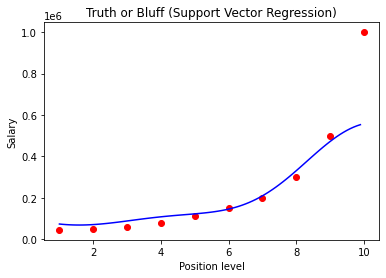

In [51]:
# create a scatter plot with the original X and Y values.
# use the inverse_transform method, to reverse the scales of both X and Y
# color the original points as 'red'
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = 'red')

# add the grid on the X axis
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

# plot the regression line with X as the original value and Y as the regressor predicted value of X
# color of the regression line should be blue
plt.plot(X_grid, sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')

# give the graph a title
plt.title('Truth or Bluff (Support Vector Regression)')

# label the x and y axes
plt.xlabel('Position level')
plt.ylabel('Salary')

# show the plot
plt.show()

In [ ]:
# 7. Result

# The position level of 6.5 salary is predicted to be around 170k, which is close to what the employee's salary of 
# 150k was